In [1]:
import pandas as pd
import numpy as np
import os,seaborn
from pandas import Series

from os.path import join, getsize

%matplotlib inline
import matplotlib.pyplot as plt

import sys

In [2]:
# 获取附件一中的所有文件路径
filepath = np.array([])
for root, dirs, files in os.walk('../data/attachment_1_100/'):
    filepath = np.concatenate((filepath,np.array([join(root, name) for name in files])))
print("\t".join(filepath[:3]))

../data/attachment_1_100/AA00001.csv	../data/attachment_1_100/AA00004.csv	../data/attachment_1_100/AA00052.csv


In [ ]:
direction_angle_diff = []

### 速度差值、方位角角度分析

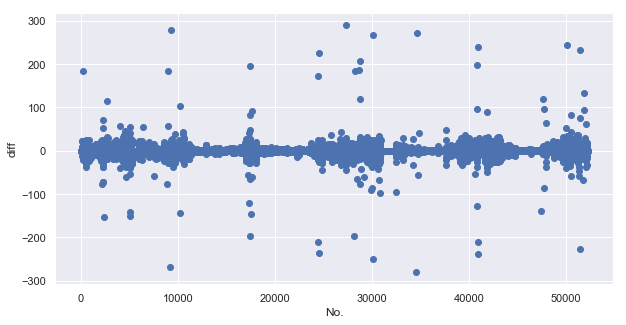

In [136]:
# for j in range(len(filepath)-70):

j=1
each_vehicle = pd.read_csv(filepath[j])

vehicle = each_vehicle
vehicle["index"] = vehicle.index
vehicle = vehicle.reset_index()


for i in range(len(vehicle)-1):

    # tmp = [speed_diff, direction, index]
    tmp = []
    tmp.append(vehicle.iloc[i+1]["gps_speed"]-vehicle.iloc[i]["gps_speed"])

    if vehicle.iloc[i]["direction_angle"] > 300 and vehicle.iloc[i+1]["direction_angle"] < 100:
        # 从左向右转，为负
        tmp.append(vehicle.iloc[i]["direction_angle"]-vehicle.iloc[i+1]["direction_angle"]-360)
    elif vehicle.iloc[i+1]["direction_angle"] > 300 and vehicle.iloc[i]["direction_angle"] < 100:
        # 从右向左转，为正
        tmp.append(vehicle.iloc[i]["direction_angle"]+360-vehicle.iloc[i+1]["direction_angle"])
    else:
        tmp.append(vehicle.iloc[i+1]["direction_angle"]-vehicle.iloc[i]["direction_angle"])

    tmp.append(vehicle.iloc[i]["index"])

    if tmp[0] !=0 and tmp[1]
    direction_angle_diff.append(tmp)

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()
# plt.scatter(range(len(direction_angle_diff)),[item[0] for item in direction_angle_diff])
plt.scatter(range(len(direction_angle_diff)),[item[1] for item in direction_angle_diff])
plt.ylabel("diff")
plt.xlabel("No.")
plt.savefig("../image/direction_speed_diff/2" + filepath[j].split("/")[-1].split(".")[0] + ".jpg")
plt.show()

In [142]:
ddede = []
for i in direction_angle_diff:
    if i[0] != 0 and i[1]!=0:
        ddede.append(i)

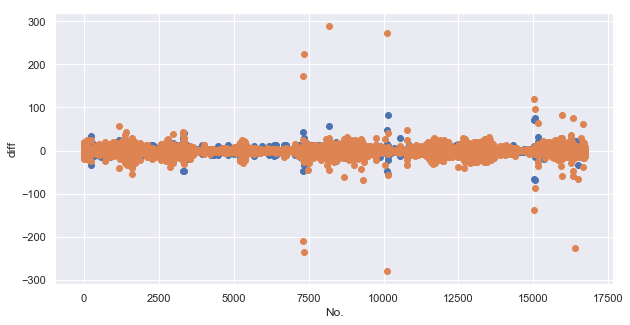

In [151]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()
plt.scatter(range(len(ddede)),[item[0] for item in ddede])
plt.scatter(range(len(ddede)),[item[1] for item in ddede])
plt.ylabel("diff")
plt.xlabel("No.")
# plt.savefig("../image/direction_speed_diff/2" + filepath[j].split("/")[-1].split(".")[0] + ".jpg")
plt.show()

### 利用经纬度坐标来判断离群点

In [5]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371.393 # 地球平均半径，单位为公里
    return c * r * 1000

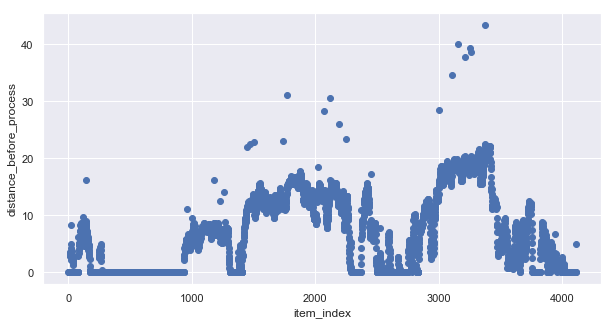

In [34]:
# for j in range(len(filepath)):

#     j=1
vehicle = pd.read_csv("data/process_file/AA00004_1.csv")


distance = [(i,haversine(vehicle.iloc[i+1]["lng"],vehicle.iloc[i+1]["lat"],
                                             vehicle.iloc[i]["lng"],vehicle.iloc[i]["lat"])) for i in range(len(vehicle)-1)]

# # 每秒最大的距离
# max_distance_mil = max(list(set(vehicle["gps_speed"])))/3.6

# for i in distance:
#     if i[1]>max_distance_mil:
#         vehicle = vehicle.drop(index=i[0])


# vehicle.to_csv("data/" + filepath[j].split("/")[-1].split(".")[0] + ".csv")


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))
# Set seaborn aesthetic parameters to defaults
seaborn.set()

plt.scatter(range(len(distance)),[item[1] for item in distance])
plt.ylabel("distance_before_process")
plt.xlabel("item_index")
# plt.savefig("image/distance_image_before/" + filepath[j].split("/")[-1].split(".")[0] + "_before.jpg")
plt.show()
plt.close()

In [12]:
distance = [haversine(vehicle.iloc[i+1]["lng"],vehicle.iloc[i+1]["lat"],
                                             vehicle.iloc[i]["lng"],vehicle.iloc[i]["lat"]) for i in range(len(vehicle)-1)]
distance.append(0)
vehicle['distance'] = distance

5013

In [35]:
# 每秒最大的距离
max_distance_mil = max(list(set(vehicle["gps_speed"])))/3.6


error_index =[(i[0],i[1]) for i in distance if i[1]>max_distance_mil]

# vehicle = vehicle.drop(index=error_index)

In [36]:
error_index

[(1475, 22.555288118102908),
 (1505, 22.91798438047232),
 (1742, 22.95006797904765),
 (1773, 31.06216415477254),
 (2072, 28.31139847191996),
 (2122, 30.503181084382543),
 (2196, 26.093552322392615),
 (2250, 23.302989529746466),
 (3001, 28.460850748090344),
 (3106, 34.57131319258731),
 (3154, 40.12369026820125),
 (3214, 37.80663380567201),
 (3258, 39.458294492333316),
 (3266, 38.60815102935494),
 (3376, 43.439627559572735),
 (3377, 22.44833645179206),
 (3378, 22.258987481386388)]

In [31]:
error_index

[(487, 23.473518357339454),
 (828, 19.66140440198423),
 (887, 27.40368860154874),
 (1210, 20.39885075272038),
 (1371, 24.834749751687134),
 (1454, 39.100853553563304),
 (1478, 26.565718264413928),
 (1486, 25.608204624536405),
 (2293, 23.600257638842074),
 (3501, 21.150124341762698),
 (3528, 21.80672510349444),
 (3544, 25.63074213851428),
 (4121, 25.09931319152119),
 (4124, 19.258355752913136),
 (4706, 118.46792366829962),
 (4900, 20.293916877756395)]

In [33]:
distance[485:490]

[(485, 0.0),
 (486, 0.0),
 (487, 23.473518357339454),
 (488, 2.4287104346329653),
 (489, 2.570358011131313)]

In [14]:
error_index

[487,
 828,
 887,
 1210,
 1371,
 1454,
 1478,
 1486,
 2293,
 3501,
 3528,
 3544,
 4121,
 4124,
 4706,
 4900]

In [28]:
len(pd.read_csv("data/process_file/AA00004_0.csv"))

5030

#### 对重复项去重，并保留第一个出现的项

In [197]:
vehicle_tmp2 = vehicle.drop_duplicates(['lng','lat'],inplace=False)
vehicle_tmp2.to_csv("data/" + filepath[j].split("/")[-1].split(".")[0] + ".csv")

#### 绘制处理后距离的图形

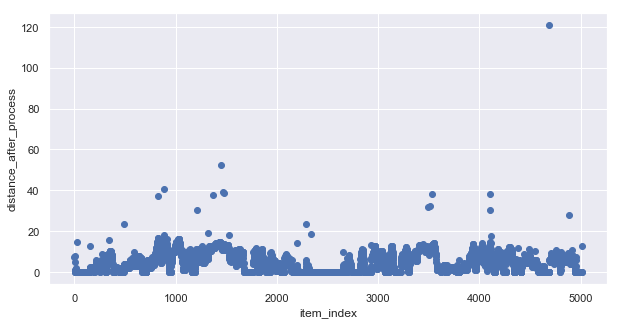

In [8]:
# vehicle = vehicle.reset_index()

vehicle_after = vehicle

distance_after = [(i,haversine(vehicle_after.iloc[i+1]["lng"],vehicle_after.iloc[i+1]["lat"],
                               vehicle_after.iloc[i]["lng"],vehicle_after.iloc[i]["lat"])) for i in range(len(vehicle_after)-1)]


        
# vehicle_after = vehicle_after.drop(index=error_index)

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()

plt.scatter(range(len(distance_after)),[item[1] for item in distance_after])
plt.ylabel("distance_after_process")
plt.xlabel("item_index")
# plt.savefig("image/distance_image_after/" + filepath[j].split("/")[-1].split(".")[0] + "_after.jpg")
plt.show()
plt.close()

In [25]:
df = pd.DataFrame([['2018-05-01 00:00:00', 15951.0, 300.904267, 49.600000],
                   ['2018-05-01 00:02:00', 16075.0, 300.904267, 49.600000],
                  ['2018-05-01 00:03:00', 16075.0, 300.904267, 49.600000]],
                  columns=['Date_time', 'current_demand', 'Temp_Mean', 'humidity_Mean'])
df

,Date_time,current_demand,Temp_Mean,humidity_Mean
0,2018-05-01 00:00:00,15951.0,300.904267,49.6
1,2018-05-01 00:02:00,16075.0,300.904267,49.6
2,2018-05-01 00:03:00,16075.0,300.904267,49.6


In [26]:
df.loc[0][["current_demand","Temp_Mean","humidity_Mean"]] = np.nan

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df

,Date_time,current_demand,Temp_Mean,humidity_Mean
0,2018-05-01 00:00:00,15951.0,300.904267,49.6
1,2018-05-01 00:02:00,16075.0,300.904267,49.6
2,2018-05-01 00:03:00,16075.0,300.904267,49.6
